In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA

# https://github.com/fastai/fastai
from fastai.structured import *
from fastai.column_data import *

# Data Prep

In [91]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

The following is taken from [this](https://www.kaggle.com/janpreets/using-the-atomic-coordinates-for-prediction] Kaggle kernel.) kaggle kernel.

In [92]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=np.float),x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=np.float))
    return pos_data, np.array(lat_data)
    


ga_cols = []
al_cols = []
o_cols = []
in_cols = []

import warnings
warnings.filterwarnings("ignore")

for i in range(6):
    ga_cols.append("Ga_"+str(i))

for i in range(6):
    al_cols.append("Al_"+str(i))

for i in range(6):
    o_cols.append("O_"+str(i))

for i in range(6):
    in_cols.append("In_"+str(i))



ga_df= pd.DataFrame(columns=ga_cols)
al_df = pd.DataFrame(columns=al_cols)
o_df = pd.DataFrame(columns= o_cols)
in_df = pd.DataFrame(columns=in_cols)

for i in train.id.values:
    fn = "../input/train/{}/geometry.xyz".format(i)
    train_xyz, train_lat = get_xyz_data(fn)
    
    ga_list = []
    al_list = []
    o_list = []
    in_list = []
    
    for li in train_xyz:
        try:
            if li[1] == "Ga":
                ga_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "Al":
                al_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "In":
                in_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "O":
                o_list.append(li[0])
        except:
            pass
    
#     ga_list = [item for sublist in ga_list for item in sublist]
#     al_list = [item for sublist in al_list for item in sublist]
#     o_list = [item for sublist in o_list for item in sublist]
   
    
    try:
        model = PCA(n_components=2)
        ga_list = np.array(ga_list)
        temp_ga = model.fit_transform(ga_list.transpose())
        temp_ga = [item for sublist in temp_ga for item in sublist]
       
    except:
        temp_ga = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        al_list = np.array(al_list)
        temp_al = model.fit_transform(al_list.transpose())
        temp_al = [item for sublist in temp_al for item in sublist]
#         print i
    except:
        temp_al = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        o_list = np.array(o_list)
        temp_o = model.fit_transform(o_list.transpose())
        temp_o = [item for sublist in temp_o for item in sublist]
#         print i
    except:
        temp_o = [0,0,0,0,0,0]
#         print i
    
    try:
        model = PCA(n_components=2)
        in_list = np.array(in_list)
        temp_in = model.fit_transform(in_list.transpose())
        temp_in = [item for sublist in temp_in for item in sublist]
#         print i
    except:
        temp_in = [0,0,0,0,0,0]
#         print i

    temp_ga = pd.DataFrame(temp_ga).transpose()
    temp_ga.columns = ga_cols
    temp_ga.index = np.array([i])

    temp_al = pd.DataFrame(temp_al).transpose()
    temp_al.columns = al_cols
    temp_al.index = np.array([i])

    temp_o = pd.DataFrame(temp_o).transpose()
    temp_o.columns = o_cols
    temp_o.index = np.array([i])
    
    temp_in = pd.DataFrame(temp_in).transpose()
    temp_in.columns = in_cols
    temp_in.index = np.array([i])
    
    

    ga_df = pd.concat([ga_df,temp_ga])
    al_df = pd.concat([al_df,temp_al])
    o_df = pd.concat([o_df,temp_o])    
    in_df = pd.concat([in_df,temp_in])
    
ga_df["id"] = ga_df.index
al_df["id"] = al_df.index
o_df["id"] = o_df.index
in_df["id"] = in_df.index

train = pd.merge(train,ga_df,on = ["id"],how = "left")
train = pd.merge(train,al_df,on = ["id"],how = "left")
train = pd.merge(train,o_df,on = ["id"],how = "left")
train = pd.merge(train,in_df,on = ["id"],how = "left")
    
ga_df= pd.DataFrame(columns=ga_cols)
al_df = pd.DataFrame(columns=al_cols)
o_df = pd.DataFrame(columns= o_cols)
in_df = pd.DataFrame(columns=in_cols)    

for i in test.id.values:
    fn = "../input/test/{}/geometry.xyz".format(i)
    train_xyz, train_lat = get_xyz_data(fn)
    
    ga_list = []
    al_list = []
    o_list = []
    in_list = []
    
    for li in train_xyz:
        try:
            if li[1] == "Ga":
                ga_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "Al":
                al_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "In":
                in_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "O":
                o_list.append(li[0])
        except:
            pass
    
#     ga_list = [item for sublist in ga_list for item in sublist]
#     al_list = [item for sublist in al_list for item in sublist]
#     o_list = [item for sublist in o_list for item in sublist]
   
    
    try:
        model = PCA(n_components=2)
        ga_list = np.array(ga_list)
        temp_ga = model.fit_transform(ga_list.transpose())
        temp_ga = [item for sublist in temp_ga for item in sublist]
       
    except:
        temp_ga = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        al_list = np.array(al_list)
        temp_al = model.fit_transform(al_list.transpose())
        temp_al = [item for sublist in temp_al for item in sublist]
#         print i
    except:
        temp_al = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        o_list = np.array(o_list)
        temp_o = model.fit_transform(o_list.transpose())
        temp_o = [item for sublist in temp_o for item in sublist]
#         print i
    except:
        temp_o = [0,0,0,0,0,0]
#         print i
    
    try:
        model = PCA(n_components=2)
        in_list = np.array(in_list)
        temp_in = model.fit_transform(in_list.transpose())
        temp_in = [item for sublist in temp_in for item in sublist]
#         print i
    except:
        temp_in = [0,0,0,0,0,0]
#         print i

    temp_ga = pd.DataFrame(temp_ga).transpose()
    temp_ga.columns = ga_cols
    temp_ga.index = np.array([i])

    temp_al = pd.DataFrame(temp_al).transpose()
    temp_al.columns = al_cols
    temp_al.index = np.array([i])

    temp_o = pd.DataFrame(temp_o).transpose()
    temp_o.columns = o_cols
    temp_o.index = np.array([i])
    
    temp_in = pd.DataFrame(temp_in).transpose()
    temp_in.columns = in_cols
    temp_in.index = np.array([i])
    
    

    ga_df = pd.concat([ga_df,temp_ga])
    al_df = pd.concat([al_df,temp_al])
    o_df = pd.concat([o_df,temp_o])    
    in_df = pd.concat([in_df,temp_in])
    

ga_df["id"] = ga_df.index
al_df["id"] = al_df.index
o_df["id"] = o_df.index
in_df["id"] = in_df.index

test = pd.merge(test,ga_df,on = ["id"],how = "left")
test = pd.merge(test,al_df,on = ["id"],how = "left")
test = pd.merge(test,o_df,on = ["id"],how = "left")
test = pd.merge(test,in_df,on = ["id"],how = "left")



X_train = train#train.head(2200)

# X_val = train.tail(200)

y_train_1 = X_train['formation_energy_ev_natom']
y_train_2 = X_train["bandgap_energy_ev"]

# y_val_1 = X_val['formation_energy_ev_natom']
# y_val_2 = X_val["bandgap_energy_ev"]


X_train = X_train.drop(["formation_energy_ev_natom","bandgap_energy_ev", 'id'],axis =1)
# X_val = X_val.drop(["formation_energy_ev_natom","bandgap_energy_ev", 'id'],axis =1)


X_train.In_0 = X_train.In_0.astype(np.float32)
X_train.In_1 = X_train.In_1.astype(np.float32)
X_train.In_2 = X_train.In_2.astype(np.float32)
X_train.In_3 = X_train.In_3.astype(np.float32)
X_train.In_4 = X_train.In_4.astype(np.float32)
X_train.In_5 = X_train.In_5.astype(np.float32)

# X_val.In_0 = X_val.In_0.astype(np.float32)
# X_val.In_1 = X_val.In_1.astype(np.float32)
# X_val.In_2 = X_val.In_2.astype(np.float32)
# X_val.In_3 = X_val.In_3.astype(np.float32)
# X_val.In_4 = X_val.In_4.astype(np.float32)
# X_val.In_5 = X_val.In_5.astype(np.float32)


test.In_0 = test.In_0.astype(np.float32)
test.In_1 = test.In_1.astype(np.float32)
test.In_2 = test.In_2.astype(np.float32)
test.In_3 = test.In_3.astype(np.float32)
test.In_4 = test.In_4.astype(np.float32)
test.In_5 = test.In_5.astype(np.float32)

test_id = test['id'].copy()
test = test.drop('id', axis=1)

In [93]:
X_train.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,O_2,O_3,O_4,O_5,In_0,In_1,In_2,In_3,In_4,In_5
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,...,16.817657,-0.743367,-7.667648,13.022131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,...,-26.483708,9.694593,55.814256,-0.324141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,...,18.657108,-7.153158,-17.775636,-8.272831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,...,-6.535425,5.417252,18.701654,-0.988195,-3.018391,0.697301,-3.537541,-0.661436,6.555933,-0.035865
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,...,-28.288804,10.333018,57.349369,-0.092288,-9.490990,3.752989,-13.992479,-3.302192,23.483469,-0.450797


In [94]:
X_train.dtypes

spacegroup                      int64
number_of_total_atoms         float64
percent_atom_al               float64
percent_atom_ga               float64
percent_atom_in               float64
lattice_vector_1_ang          float64
lattice_vector_2_ang          float64
lattice_vector_3_ang          float64
lattice_angle_alpha_degree    float64
lattice_angle_beta_degree     float64
lattice_angle_gamma_degree    float64
Ga_0                          float64
Ga_1                          float64
Ga_2                          float64
Ga_3                          float64
Ga_4                          float64
Ga_5                          float64
Al_0                          float64
Al_1                          float64
Al_2                          float64
Al_3                          float64
Al_4                          float64
Al_5                          float64
O_0                           float64
O_1                           float64
O_2                           float64
O_3         

In [95]:
X_train.describe()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,O_2,O_3,O_4,O_5,In_0,In_1,In_2,In_3,In_4,In_5
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,...,-6.421574,2.219081,10.278266,1.027914,0.245591,0.421825,-3.570230,-0.374910,3.324639,-0.046915
std,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,...,16.182902,8.594958,24.630100,6.574858,10.157738,3.910006,6.962660,3.879292,10.714629,3.173652
min,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,...,-29.417050,-13.953946,-26.248045,-11.344656,-21.093151,-11.908874,-22.249285,-12.229986,-20.215862,-11.899655
25%,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,...,-26.051329,-5.659644,-7.675847,-2.262659,-5.328010,-1.536336,-7.702854,-2.892687,-2.830578,-1.023361
50%,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,...,-6.653003,5.310249,14.623858,-0.604961,-0.731288,0.000000,-3.110090,0.000000,0.000000,-0.056492
75%,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,...,10.702986,10.056414,19.584701,5.064403,0.000000,1.771441,0.000000,1.067257,9.903929,0.000000
max,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,...,23.494396,15.058075,58.906129,15.128008,41.609741,13.785874,17.012960,13.784061,42.359432,13.787948


#### we'll treat *spacegroup* as categorical, the rest should be float32 and will be represented with an embedding matrix in the network

See: [Entity Embeddings of Categorical Variables](https://arxiv.org/abs/1604.06737)

In [96]:
cat_vars = ['spacegroup']
contin_vars = [c for c in X_train.columns if c not in cat_vars]

n = len(X_train); n

2400

In [97]:
for v in cat_vars: X_train[v] = X_train[v].astype('category').cat.as_ordered()

In [98]:
for v in contin_vars: X_train[v] = X_train[v].astype(np.float32)
# for v in contin_vars: X_val[v] = X_val[v].astype(np.float32)

#### now, apply the *spacegroup* categories to the test data

In [99]:
apply_cats(df=test, trn=X_train)

#### set the dependent var, because there are two vars to predict

In [100]:
# dep_var = y_train_1
dep_var = y_train_2

In [101]:
dep_var.name

'bandgap_energy_ev'

#### prepare the training data

In [102]:
df_train, y, nas, mapper = proc_df(
    df=pd.concat([X_train, dep_var], axis=1), 
    y_fld=dep_var.name, 
    do_scale=True
)

In [103]:
df_train.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,O_2,O_3,O_4,O_5,In_0,In_1,In_2,In_3,In_4,In_5
0,2,0.810885,0.902265,0.284159,-1.162707,-0.013767,0.774800,-0.626795,-0.180788,-0.452320,...,1.436335,-0.344745,-0.728769,1.824635,-0.024183,-0.107906,0.512875,0.096664,-0.310354,0.014786
1,4,0.810885,0.902265,0.284159,-1.162707,-0.681399,-0.477888,2.024991,-0.168789,-0.453130,...,-1.239970,0.869937,1.849180,-0.205683,-0.024183,-0.107906,0.512875,0.096664,-0.310354,0.014786
2,6,-0.959526,1.608450,-0.518259,-1.162707,-0.049431,-0.755305,0.251341,0.543840,-0.240849,...,1.550025,-1.090662,-1.139246,-1.414887,-0.024183,-0.107906,0.512875,0.096664,-0.310354,0.014786
3,3,-1.402128,1.373055,-1.320676,-0.212653,-0.890531,-1.102460,0.172217,-0.191139,-0.450507,...,-0.007037,0.372176,0.342067,-0.306703,-0.321397,0.070469,0.004696,-0.073876,0.301641,0.003482
4,4,0.810885,-1.451685,1.354049,0.262373,-0.596817,-0.225287,2.199793,-0.185737,-0.452639,...,-1.351537,0.944231,1.911519,-0.170412,-0.958738,0.852136,-1.497189,-0.754749,1.881823,-0.127287


In [104]:
y[:5]

array([3.4387, 2.921 , 2.7438, 3.3492, 1.3793])

#### prepare the test data

In [105]:
# required filler
test[dep_var.name] = 0

In [106]:
df_test, _, nas, mapper = proc_df(
    df=test,
    y_fld=dep_var.name,
    do_scale=True,
    mapper=mapper, 
    na_dict=nas
)

In [107]:
df_test.shape

(600, 35)

# Training

#### set up training params

In [108]:
y_range = (np.min(dep_var) * 0.8, np.max(dep_var) * 1.2)

In [109]:
X_train.shape

(2400, 35)

In [110]:
X_train.index.values

array([   0,    1,    2, ..., 2397, 2398, 2399])

In [111]:
# val_idx = np.random.choice(X_train.index.values, 2000, replace=False)
val_idx = get_cv_idxs(X_train.shape[0])

In [112]:
val_idx[:10]

array([2037, 1978,  855, 1719, 2019,  134, 1375, 1711, 1289, 1068])

In [113]:
len(val_idx)

480

#### create a ModelData object

In [114]:
md = ColumnarModelData.from_data_frame(
    path='.', 
    val_idxs=val_idx, 
    df=df_train, 
    y=y, 
    cat_flds=cat_vars, 
    bs=32,
    test_df=df_test
)

In [115]:
# create list of tuples for categorical variables
cat_sz = [(c, len(X_train[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('spacegroup', 7)]

In [116]:
# create list of tuples of embedding matrix dimensions
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(7, 4)]

#### get the learner object

In [117]:
n_cont=len(df_train.columns)-len(cat_vars)

In [118]:
m = md.get_learner(
    emb_szs=emb_szs,  # dimension of embedding matricies
    n_cont=n_cont,    # number of continuous vars
    emb_drop=0.4,     # embedding dropout
    out_sz=1,         # out size of one since perfroming regression
    szs=[1000, 500],  # sizes of fully connected layers
    drops=[0.1, 0.1], # dropout for fully connected layers
    y_range=y_range   # y-range
)

guess at a good learning rate

In [119]:
m.lr_find(start_lr=1e-7, end_lr=10)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                            
    0      4.475555   5.149793  



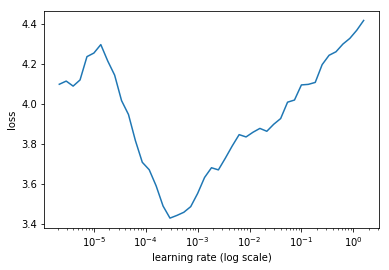

In [120]:
m.sched.plot()

lr_find() method is an implementation of [Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186)

Basically, it keeps increasing the learning rate until the loss stops decreasing.

**1e-4** looks reasonable as loss is still decreasing...

In [121]:
lr = 1e-4

In [122]:
def rmsle(predicted, actual):
    assert len(predicted) == len(actual)
    return np.sqrt((np.power(np.log1p(actual) - np.log1p(predicted), 2)).mean())

### architecture summary

In [142]:
m.summary

<bound method Learner.summary of MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(7, 4)
  )
  (lins): ModuleList(
    (0): Linear(in_features=38, out_features=1000)
    (1): Linear(in_features=1000, out_features=500)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=1)
  (emb_drop): Dropout(p=0.4)
  (drops): ModuleList(
    (0): Dropout(p=0.1)
    (1): Dropout(p=0.1)
  )
  (bn): BatchNorm1d(34, eps=1e-05, momentum=0.1, affine=True)
)>

### now, we can train
run fit() until we start to overfit

In [127]:
m.fit(lr, n_cycle=4, metrics=[rmsle], cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   rmsle                      
    0      0.089214   0.091823   0.108341  
    1      0.089229   0.084573   0.10387                    
    2      0.090938   0.080019   0.101326                   
    3      0.088779   0.079676   0.102705                   
    4      0.084583   0.080181   0.101888                   
    5      0.083939   0.078168   0.10087                    
    6      0.084355   0.083842   0.103923                   
    7      0.078938   0.07947    0.102047                   



[0.07947042, 0.10204705178509688]

check how the model did on the training data

In [128]:
train_pred, actual = m.predict_with_targs()

In [129]:
rmsle(train_pred, actual)

0.10501234

#### make predictions on test set

In [130]:
preds = m.predict(is_test=True)

In [131]:
preds.shape

(600, 1)

### create submission

note the above should be run through twice with the 2 required dep_vars.

In [132]:
dep_var.name

'bandgap_energy_ev'

In [133]:
if 'formation' in dep_var.name:
    preds_formation_energy_ev_natom = preds.copy()
elif 'bandgap' in dep_var.name:
    preds_bandgap_energy_ev = preds.copy()

In [134]:
test.columns

Index(['spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'Ga_0', 'Ga_1', 'Ga_2', 'Ga_3', 'Ga_4',
       'Ga_5', 'Al_0', 'Al_1', 'Al_2', 'Al_3', 'Al_4', 'Al_5', 'O_0', 'O_1',
       'O_2', 'O_3', 'O_4', 'O_5', 'In_0', 'In_1', 'In_2', 'In_3', 'In_4',
       'In_5', 'bandgap_energy_ev'],
      dtype='object')

In [135]:
submission_df = pd.DataFrame({
    'id': test_id,
    'formation_energy_ev_natom': preds_formation_energy_ev_natom.reshape(600),
    'bandgap_energy_ev': preds_bandgap_energy_ev.reshape(600)
})[['id', 'formation_energy_ev_natom', 'bandgap_energy_ev']]

In [136]:
submission_df.head()

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.172706,1.884877
1,2,0.074906,3.693928
2,3,0.185500,3.428403
3,4,0.044563,2.995854
4,5,0.147942,1.728915


In [137]:
submission_df.to_csv('../submissions/fastai_subm.csv', index=False)